In [1]:
import math                           
import numpy as np                    
from sklearn import linear_model      
from os import mkdir                  
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as stats
import seaborn as sn
import statsmodels.api as sm

In [2]:
na_values= ['', 'no developer', 'no publisher']
filename = 'GAMES.csv'
df = pd.read_csv(filename, sep=',', nrows=20000000, na_values=na_values)

In [3]:
df = df.dropna(how='any')

In [4]:
total = df.loc[:,"n_pos"] + df.loc[:,'n_neg']
i = total > 20

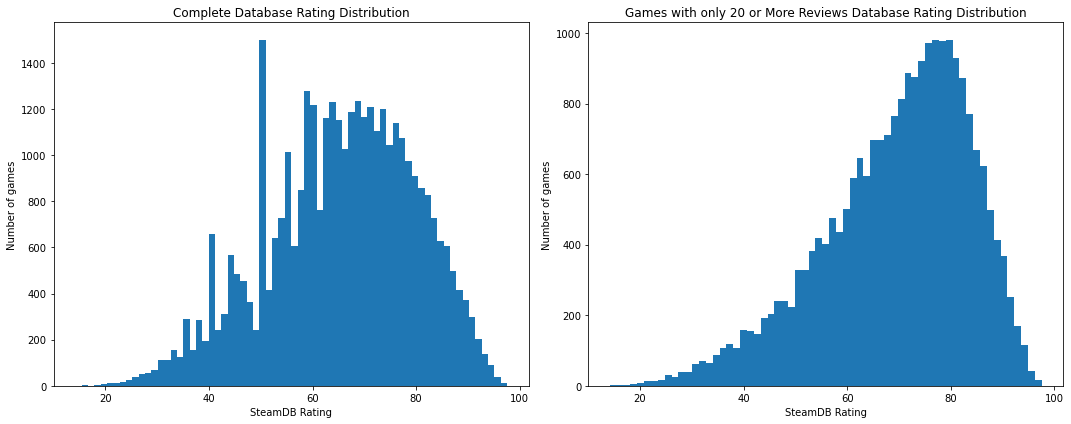

In [5]:
plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df.loc[:, 'sdb_rating'], 'auto')
plt.ylabel('Number of games')
plt.xlabel('SteamDB Rating')
plt.title('Complete Database Rating Distribution')

plt.subplot(1, 2, 2)
plt.hist(df.loc[:, 'sdb_rating'][i], 'auto')
plt.ylabel('Number of games')
plt.xlabel('SteamDB Rating')
plt.title('Games with only 20 or More Reviews Database Rating Distribution')

plt.tight_layout()
plt.show()

In [6]:
df=df[i]
df = df.reset_index()

In [7]:
df.head()

,index,app_id,name,n_pos,n_neg,sdb_rating,price,developer,publisher,tags
0,0,10,Counter-Strike,167732,4340,96.22,9.99,Valve,Valve,"Strategy, Action, Survival, FPS, Classic, Tact..."
1,1,20,Team Fortress Classic,4576,791,82.60,4.99,Valve,Valve,"Action, FPS, Co-op, Classic, Fast-Paced, Shoot..."
2,2,30,Day of Defeat,4487,491,87.04,4.99,Valve,Valve,"Strategy, Action, FPS, War, Co-op, Classic, Ta..."
3,3,40,Deathmatch Classic,1641,350,79.13,4.99,Valve,Valve,"Action, FPS, Co-op, Classic, Fast-Paced, Shoot..."
4,4,50,Half-Life: Opposing Force,9737,507,92.26,4.99,Gearbox Software,Valve,"Action, Adventure, FPS, Puzzle, Moddable, Alie..."


In [8]:
def createTags(dataframe):
    tags=[]
    #df = dataframe.head()
    for index, row in dataframe.iterrows():
        aux = row['tags'].split(", ")
        for i in aux:
            if i not in tags:
                tags.append(i)
                dataframe.loc[:, i] = np.zeros(np.shape(dataframe)[0])
            dataframe.at[index, i]=1
    return dataframe.drop(axis=1, labels='tags')

In [9]:
tagdf = createTags(df)

In [10]:
tagdf.loc[:, ['sdb_rating','price']].describe()

,sdb_rating,price
count,23487.000000,23487.000000
mean,69.593651,8.910585
std,14.129088,9.910757
min,14.180000,0.000000
25%,61.080000,0.990000
50%,71.950000,5.990000
75%,80.190000,12.990000
max,97.570000,199.975000


In [11]:
tagdict = {}
for tag in tagdf.columns[8:]:
    tagdict[tag]=tagdf.loc[:,tag].value_counts()[1]
tagdict=sorted(tagdict.items(), key = lambda x: x[1], reverse=True)

### ------------------------

### Tag analysis

In [13]:
avgs = []
for t in range(len(tagdict)):
    mask = df[tagdict[t][0]]
    mask = mask == 1
    avg_ratings = df[mask]['sdb_rating'].sum()
    avg_ratings /= len(df[mask])
    avgs.append(avg_ratings)

/Users/gabrielmedeiros/opt/anaconda3/envs/MODS202/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


#### Let's consider the top X used tags and compare the avarage rating of games containing that tag.

In [14]:
X = 10
topXtags = tagdict[0:X]
for i in range(len(topXtags)):
    topXtags[i] = topXtags[i][0]

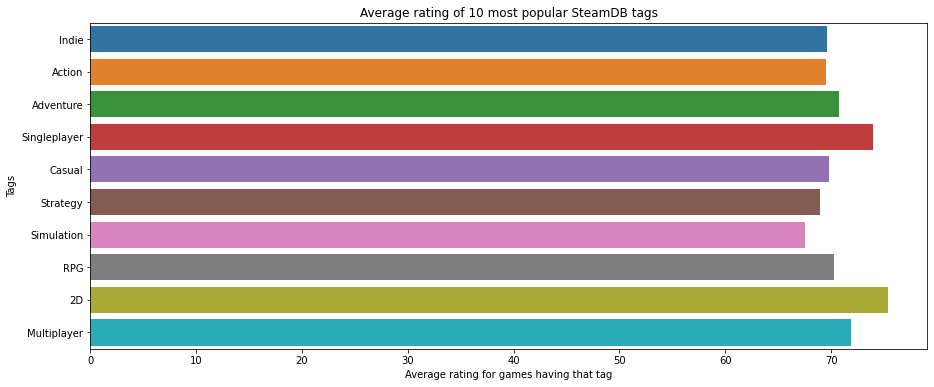

In [15]:
plt.figure(figsize=(15, 6))
ax = sn.barplot(x=avgs[0:X], y=topXtags)
plt.title('Average rating of 10 most popular SteamDB tags')
plt.xlabel("Average rating for games having that tag");
plt.ylabel("Tags")
plt.show()

#### Now let's consider the top Y tags who have got the highest average rate.

In [16]:
pairs = []
for i in range(len(avgs)):
    pairs.append([tagdict[i][0], avgs[i]])

In [17]:
pairs.sort(key = lambda x: x[1])
pairs.reverse()

In [18]:
Y = 10
thry = pairs[0:Y]
thrx = pairs[0:Y]
for i in range(len(thrx)):
    thry[i] = thry[i][0]
    thrx[i] = thrx[i][1]

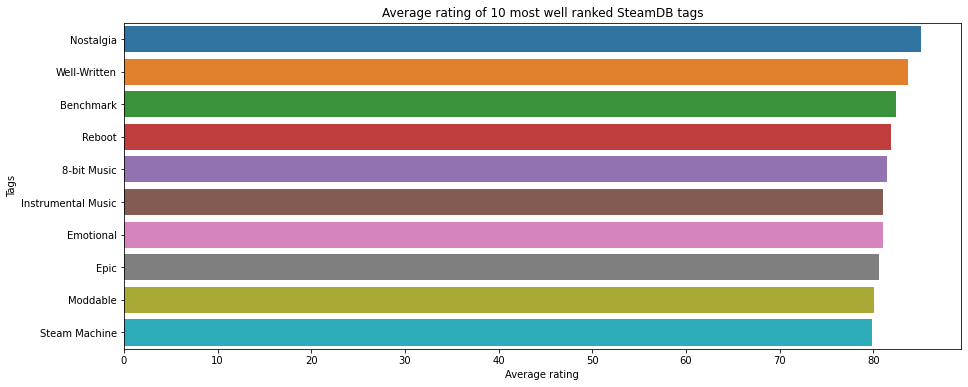

In [19]:
plt.figure(figsize=(15, 6))
sn.barplot(x=thrx, y=thry);
plt.title("Average rating of 10 most well ranked SteamDB tags")
plt.xlabel("Average rating")
plt.ylabel('Tags')
plt.show()

### A simple visualization of the Z most popular tags

In [20]:
Z = 10
mpy = tagdict[0:Z]
mpx = tagdict[0:Z]
for i in range(len(mpy)):
    mpy[i] = mpy[i][0]
    mpx[i] = mpx[i][1]

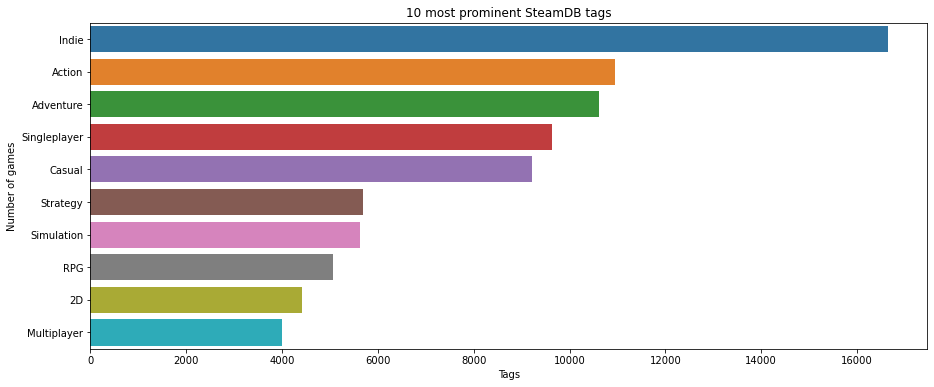

In [21]:
plt.figure(figsize=(15, 6))
ax = sn.barplot(x=mpx, y=mpy);
plt.title("10 most prominent SteamDB tags")
plt.xlabel("Tags")
plt.ylabel("Number of games")
plt.show()

### Looking for a relation between tags and price

In [22]:
prices = []
for t in range(len(tagdict)):
    mask = df[tagdict[t][0]]
    mask = mask == 1
    avg_price = df[mask]['price'].sum()
    avg_price /= len(df[mask])
    prices.append(avg_price)

/Users/gabrielmedeiros/opt/anaconda3/envs/MODS202/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [23]:
price_pairs = []
for i in range(len(prices)):
    price_pairs.append([tagdict[i][0], prices[i]])
    
price_pairs.sort(key = lambda x: x[1])
price_pairs.reverse()

In [24]:
W = 10
tpy = price_pairs[0:W]
tpx = price_pairs[0:W]
for i in range(len(tpx)):
    tpy[i] = tpy[i][0]
    tpx[i] = tpx[i][1]

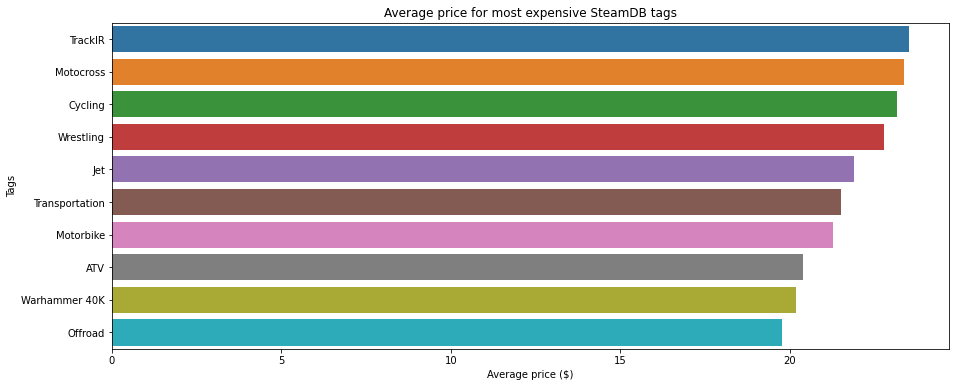

In [25]:
plt.figure(figsize=(15, 6)) 
sn.barplot(x=tpx, y=tpy);
plt.title('Average price for most expensive SteamDB tags')
plt.xlabel("Average price ($)");
plt.ylabel('Tags')
plt.show()

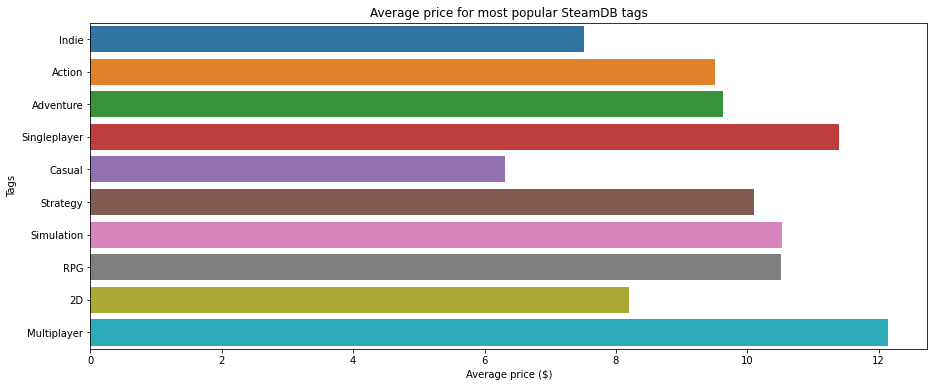

In [26]:
K = 10
topKtags = tagdict[0:K]
for i in range(len(topKtags)):
    topKtags[i] = topKtags[i][0]
    
plt.figure(figsize=(15, 6))    
ax = sn.barplot(x=prices[0:K], y=topKtags)
plt.title('Average price for most popular SteamDB tags')
plt.xlabel("Average price ($)");
plt.ylabel('Tags')
plt.show()

### Developers that developed more games and Prices

In [27]:
selected_develop=list((df.developer.value_counts()[:30]).index)

In [28]:
df2 = df.groupby('developer').mean()

In [29]:
mean_biggest = df2[df2.index.isin(selected_develop)].price.mean()

In [30]:
mean_smallest = df2[~df2.index.isin(selected_develop)].price.mean()

In [31]:
vector=[mean_biggest,mean_smallest]
names = ['Biggest Developers', 'Smallest Developers']

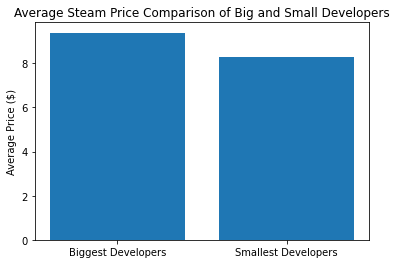

In [32]:
plt.bar(names,vector)
plt.title('Average Steam Price Comparison of Big and Small Developers')
plt.ylabel('Average Price ($)')
plt.show()

### Developers rating and Prices

In [33]:
index_dev = tagdf['developer'].value_counts().to_frame()
index_dev = index_dev.sort_index()
index_dev = index_dev['developer'] > 10
devdf = tagdf.groupby('developer').mean()
devdf = devdf[index_dev]
devdf = devdf.loc[:, ['sdb_rating', 'price']]


In [34]:
#Sorts by rating or by price to make it easier to select relevant values

#x.sort_values('sdb_rating')

In [35]:
#Function prints full dataset in order to select relevant developers
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#devdf.sort_values('sdb_rating')
#print_full(devdf)

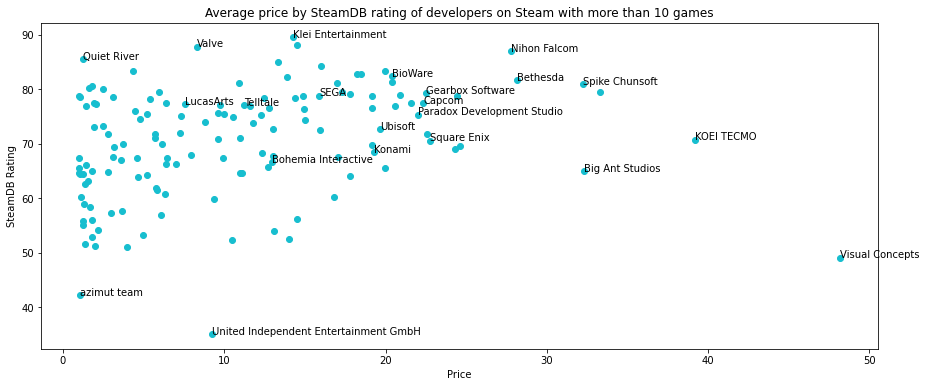

In [36]:
plt.figure(figsize=(15, 6))
plt.scatter(devdf.loc[:, "price"], devdf.loc[:, "sdb_rating"], color='C9')

plt.text(devdf.loc['Visual Concepts', "price"], devdf.loc['Visual Concepts', "sdb_rating"], 'Visual Concepts')
plt.text(devdf.loc['KOEI TECMO GAMES CO., LTD.', "price"], devdf.loc['KOEI TECMO GAMES CO., LTD.', "sdb_rating"], 'KOEI TECMO')
plt.text(devdf.loc['Big Ant Studios', "price"], devdf.loc['Big Ant Studios', "sdb_rating"], 'Big Ant Studios')
plt.text(devdf.loc['Spike Chunsoft Co., Ltd.', "price"], devdf.loc['Spike Chunsoft Co., Ltd.', "sdb_rating"], 'Spike Chunsoft')

plt.text(devdf.loc['Klei Entertainment', "price"], devdf.loc['Klei Entertainment', "sdb_rating"], 'Klei Entertainment')
plt.text(devdf.loc['Valve', "price"], devdf.loc['Valve', "sdb_rating"], 'Valve')
plt.text(devdf.loc['Quiet River', "price"], devdf.loc['Quiet River', "sdb_rating"], 'Quiet River')
plt.text(devdf.loc['United Independent Entertainment GmbH', "price"], devdf.loc['United Independent Entertainment GmbH', "sdb_rating"], 'United Independent Entertainment GmbH')
plt.text(devdf.loc['azimut team', "price"], devdf.loc['azimut team', "sdb_rating"], 'azimut team')

plt.text(devdf.loc['Ubisoft', "price"], devdf.loc['Ubisoft', "sdb_rating"], 'Ubisoft')
plt.text(devdf.loc['Telltale', "price"], devdf.loc['Telltale', "sdb_rating"], 'Telltale')
plt.text(devdf.loc['Square Enix', "price"], devdf.loc['Square Enix', "sdb_rating"], 'Square Enix')
plt.text(devdf.loc['SEGA', "price"], devdf.loc['SEGA', "sdb_rating"], 'SEGA')
plt.text(devdf.loc['Konami Digital Entertainment', "price"], devdf.loc['Konami Digital Entertainment', "sdb_rating"], 'Konami')
plt.text(devdf.loc['Capcom', "price"], devdf.loc['Capcom', "sdb_rating"], 'Capcom')
plt.text(devdf.loc['Bethesda Game Studios', "price"], devdf.loc['Bethesda Game Studios', "sdb_rating"], 'Bethesda')

plt.text(devdf.loc['BioWare', "price"], devdf.loc['BioWare', "sdb_rating"], 'BioWare')
plt.text(devdf.loc['Paradox Development Studio', "price"], devdf.loc['Paradox Development Studio', "sdb_rating"], 'Paradox Development Studio')
plt.text(devdf.loc['LucasArts', "price"], devdf.loc['LucasArts', "sdb_rating"], 'LucasArts')
#plt.text(devdf.loc['Arc System Works', "price"], devdf.loc['Arc System Works', "sdb_rating"], 'Arc System Works')
plt.text(devdf.loc['Bohemia Interactive', "price"], devdf.loc['Bohemia Interactive', "sdb_rating"], 'Bohemia Interactive')
#plt.text(devdf.loc['Codemasters', "price"], devdf.loc['Codemasters', "sdb_rating"], 'Codemasters')
#plt.text(devdf.loc['CREATIVE ASSEMBLY', "price"], devdf.loc['CREATIVE ASSEMBLY', "sdb_rating"], 'CREATIVE ASSEMBLY')
#plt.text(devdf.loc['Firaxis Games', "price"], devdf.loc['Firaxis Games', "sdb_rating"], 'Firaxis Games')
plt.text(devdf.loc['Gearbox Software', "price"], devdf.loc['Gearbox Software', "sdb_rating"], 'Gearbox Software')
plt.text(devdf.loc['Nihon Falcom', "price"], devdf.loc['Nihon Falcom', "sdb_rating"], 'Nihon Falcom')


plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('Average price by SteamDB rating of developers on Steam with more than 10 games')
plt.show()

### Publishers that published more games and Prices

In [37]:
selected_develop=list((df.publisher.value_counts()[:30]).index)

In [38]:
df2 = df.groupby('publisher').mean()

In [39]:
mean_biggest = df2[df2.index.isin(selected_develop)].price.mean()

In [40]:
mean_smallest = df2[~df2.index.isin(selected_develop)].price.mean()

In [41]:
vector=[mean_biggest,mean_smallest]
names = ['Biggest', 'Smallest']

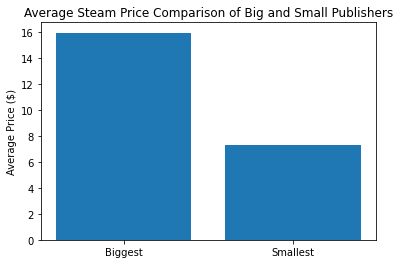

In [42]:
plt.bar(names,vector)
plt.title('Average Steam Price Comparison of Big and Small Publishers')
plt.ylabel('Average Price ($)')
plt.show()

It's noticeable that the 30 publishers with more games published have the average price equal the double of the average price of the other publishers.

### Publishers rating and Prices

In [43]:
index_pub = tagdf['publisher'].value_counts().to_frame()
index_pub = index_pub.sort_index()
index_pub = index_pub['publisher'] > 15
pubdf = tagdf.groupby('publisher').mean()
pubdf = pubdf[index_pub]
pubdf = pubdf.loc[:, ['sdb_rating', 'price']]
#pubdf

In [44]:
#Sorts by rating or by price to make it easier to select relevant values

#pubdf.sort_values('price')

In [45]:
#print_full(pubdf)

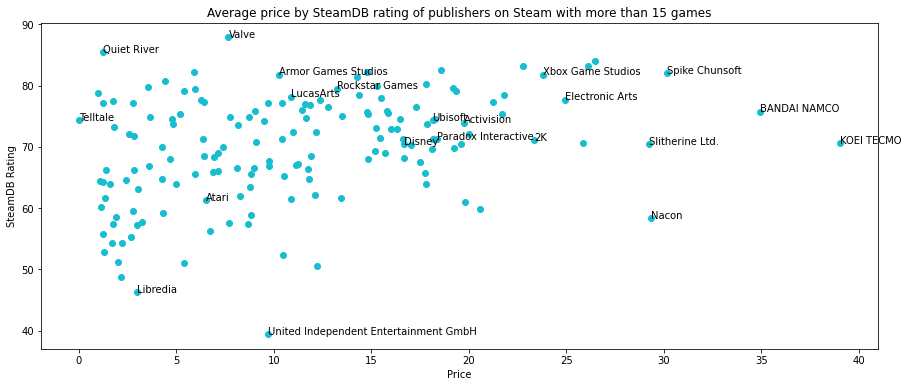

In [46]:
plt.figure(figsize=(15, 6))
plt.scatter(pubdf.loc[:, "price"], pubdf.loc[:, "sdb_rating"], color='C9')

plt.text(pubdf.loc['United Independent Entertainment GmbH', "price"], pubdf.loc['United Independent Entertainment GmbH', "sdb_rating"], 'United Independent Entertainment GmbH')
plt.text(pubdf.loc['Libredia', "price"], pubdf.loc['Libredia', "sdb_rating"], 'Libredia')
plt.text(pubdf.loc['Valve', "price"], pubdf.loc['Valve', "sdb_rating"], 'Valve')
plt.text(pubdf.loc['Quiet River', "price"], pubdf.loc['Quiet River', "sdb_rating"], 'Quiet River')

plt.text(pubdf.loc['Telltale Games', "price"], pubdf.loc['Telltale Games', "sdb_rating"], 'Telltale')
plt.text(pubdf.loc['KOEI TECMO GAMES CO., LTD.', "price"], pubdf.loc['KOEI TECMO GAMES CO., LTD.', "sdb_rating"], 'KOEI TECMO')
plt.text(pubdf.loc['BANDAI NAMCO Entertainment', "price"], pubdf.loc['BANDAI NAMCO Entertainment', "sdb_rating"], 'BANDAI NAMCO')
plt.text(pubdf.loc['Spike Chunsoft Co., Ltd.', "price"], pubdf.loc['Spike Chunsoft Co., Ltd.', "sdb_rating"], 'Spike Chunsoft')

plt.text(pubdf.loc['Activision', "price"], pubdf.loc['Activision', "sdb_rating"], 'Activision')
plt.text(pubdf.loc['Disney', "price"], pubdf.loc['Disney', "sdb_rating"], 'Disney')
plt.text(pubdf.loc['Electronic Arts', "price"], pubdf.loc['Electronic Arts', "sdb_rating"], 'Electronic Arts')
#plt.text(pubdf.loc['Jackbox Games, Inc.', "price"], pubdf.loc['Jackbox Games, Inc.', "sdb_rating"], 'Jackbox Games')
plt.text(pubdf.loc['Ubisoft', "price"], pubdf.loc['Ubisoft', "sdb_rating"], 'Ubisoft')

plt.text(pubdf.loc['2K', "price"], pubdf.loc['2K', "sdb_rating"], '2K')
#plt.text(pubdf.loc['Adult Swim Games', "price"], pubdf.loc['Adult Swim Games', "sdb_rating"], 'Adult Swim Games')
plt.text(pubdf.loc['Armor Games Studios', "price"], pubdf.loc['Armor Games Studios', "sdb_rating"], 'Armor Games Studios')
plt.text(pubdf.loc['Atari', "price"], pubdf.loc['Atari', "sdb_rating"], 'Atari')
plt.text(pubdf.loc['LucasArts', "price"], pubdf.loc['LucasArts', "sdb_rating"], 'LucasArts')
plt.text(pubdf.loc['Paradox Interactive', "price"], pubdf.loc['Paradox Interactive', "sdb_rating"], 'Paradox Interactive')
plt.text(pubdf.loc['Rockstar Games', "price"], pubdf.loc['Rockstar Games', "sdb_rating"], 'Rockstar Games')
plt.text(pubdf.loc['Xbox Game Studios', "price"], pubdf.loc['Xbox Game Studios', "sdb_rating"], 'Xbox Game Studios')
plt.text(pubdf.loc['Nacon', "price"], pubdf.loc['Nacon', "sdb_rating"], 'Nacon')
plt.text(pubdf.loc['Slitherine Ltd.', "price"], pubdf.loc['Slitherine Ltd.', "sdb_rating"], 'Slitherine Ltd.')
#plt.text(pubdf.loc['', "price"], pubdf.loc['', "sdb_rating"], '')

plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('Average price by SteamDB rating of publishers on Steam with more than 15 games')
plt.show()

## Check best games for most relevant tags

### Best indie games

In [47]:
reldf = tagdf
reldf.loc[:, 'total'] = reldf.loc[:, 'n_pos'] + reldf.loc[:, 'n_neg']
reldf = reldf.loc[:, ['name', 'price', 'total', 'sdb_rating']]
#reldf

In [48]:
def selectTag(tag, tagdf):
    return tagdf.loc[:, tag] == 1

In [49]:
#Lets filter the 200 most popular indie games
indie = selectTag('Indie', tagdf)
indiedf = reldf[indie].sort_values('total', ascending = False).head(200)
#indiedf

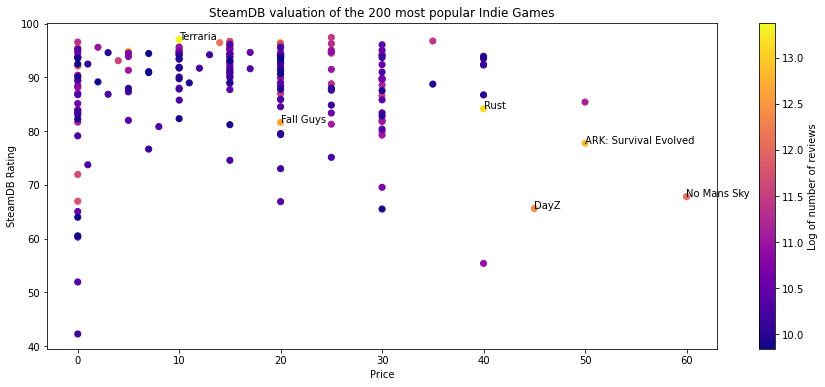

In [50]:
plt.figure(figsize=(15, 6))
plt.scatter(indiedf.loc[:, "price"], indiedf.loc[:, "sdb_rating"],marker = '.', s=150, linewidths=1, c = np.log(indiedf.loc[:, 'total']), cmap=plt.cm.plasma)

plt.text(indiedf.loc[1187, "price"], indiedf.loc[1187, "sdb_rating"], 'Terraria')
plt.text(indiedf.loc[2150, "price"], indiedf.loc[2150, "sdb_rating"], 'Rust')
plt.text(indiedf.loc[2699, "price"], indiedf.loc[2699, "sdb_rating"], 'No Mans Sky')
plt.text(indiedf.loc[4781, "price"], indiedf.loc[4781, "sdb_rating"], 'ARK: Survival Evolved')
plt.text(indiedf.loc[20257, "price"], indiedf.loc[20257, "sdb_rating"], 'Fall Guys')
plt.text(indiedf.loc[1605, "price"], indiedf.loc[1605, "sdb_rating"], 'DayZ')

plt.colorbar().set_label('Log of number of reviews')
plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('SteamDB valuation of the 200 most popular Indie Games')
plt.show()

### Best Strategy games

In [51]:
def print_full_sorted(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    print(x.sort_values('total', ascending=False))
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

In [52]:
#Lets filter the 200 most popular indie games
stretegy = selectTag('Strategy', tagdf)
strategydf = reldf[stretegy].sort_values('total', ascending = False).head(200)

#print_full_sorted(strategydf)

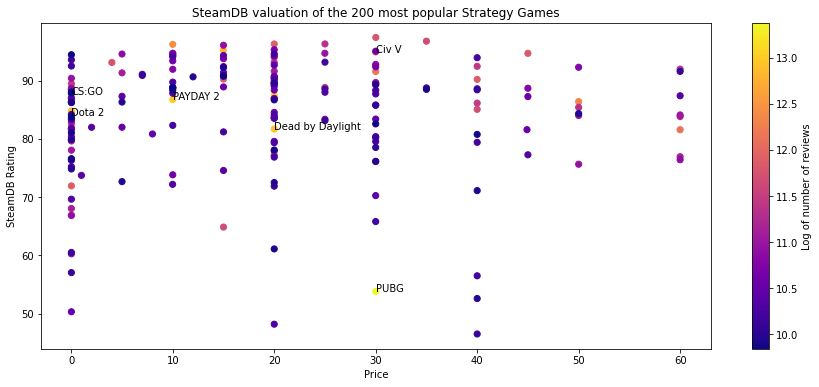

In [53]:
plt.figure(figsize=(15, 6))
plt.scatter(strategydf.loc[:, "price"], strategydf.loc[:, "sdb_rating"],marker = '.', s=150, linewidths=1, c = np.log(indiedf.loc[:, 'total']), cmap=plt.cm.plasma)

plt.text(strategydf.loc[25, "price"], strategydf.loc[25, "sdb_rating"], 'CS:GO')
plt.text(strategydf.loc[11118, "price"], strategydf.loc[11118, "sdb_rating"], 'PUBG')
plt.text(strategydf.loc[22, "price"], strategydf.loc[22, "sdb_rating"], 'Dota 2')
plt.text(strategydf.loc[250, "price"], strategydf.loc[250, "sdb_rating"], 'Civ V')
plt.text(strategydf.loc[1566, "price"], strategydf.loc[1566, "sdb_rating"], 'PAYDAY 2')
plt.text(strategydf.loc[5973, "price"], strategydf.loc[5973, "sdb_rating"], 'Dead by Daylight')
                  
plt.colorbar().set_label('Log of number of reviews')
plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('SteamDB valuation of the 200 most popular Strategy Games')
plt.show()

### Best RPG games

In [54]:
#Lets filter the 200 most popular indie games
rpg = selectTag('RPG', tagdf)
rpgdf = reldf[rpg].sort_values('total', ascending = False).head(200)

#print_full_sorted(rpgdf)

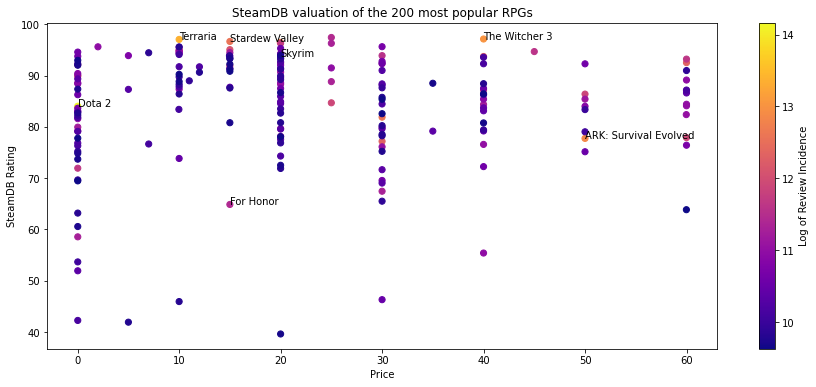

In [61]:
plt.figure(figsize=(15, 6))
plt.scatter(rpgdf.loc[:, "price"], rpgdf.loc[:, "sdb_rating"],marker = '.', s=150, linewidths=1, c = np.log(rpgdf.loc[:, 'total']), cmap=plt.cm.plasma)

plt.text(rpgdf.loc[3107, "price"], rpgdf.loc[3107, "sdb_rating"], 'The Witcher 3')
plt.text(rpgdf.loc[1187, "price"], rpgdf.loc[1187, "sdb_rating"], 'Terraria')
plt.text(rpgdf.loc[22, "price"], rpgdf.loc[22, "sdb_rating"], 'Dota 2')
plt.text(rpgdf.loc[4781, "price"], rpgdf.loc[4781, "sdb_rating"], 'ARK: Survival Evolved')
plt.text(rpgdf.loc[1085, "price"], rpgdf.loc[1085, "sdb_rating"], 'Skyrim')
plt.text(rpgdf.loc[6950, "price"], rpgdf.loc[6950, "sdb_rating"], 'Stardew Valley')
plt.text(rpgdf.loc[3488, "price"], rpgdf.loc[3488, "sdb_rating"], 'For Honor')
                  
plt.colorbar().set_label('Log of Review Incidence')
plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('SteamDB valuation of the 200 most popular RPGs')
plt.show()

In [56]:
#Lets filter the 200 most popular indie games
sim = selectTag('Simulation', tagdf)
simdf = reldf[rpg].sort_values('total', ascending = False).head(200)

#print_full_sorted(rpgdf)

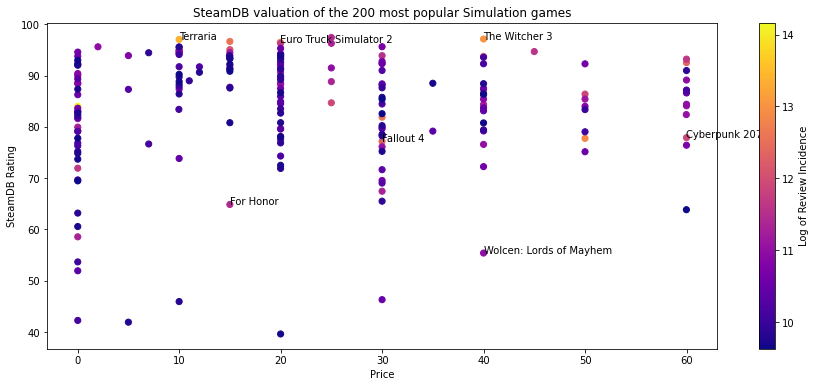

In [74]:
plt.figure(figsize=(15, 6))
plt.scatter(simdf.loc[:, "price"], simdf.loc[:, "sdb_rating"],marker = '.', s=150, linewidths=1, c = np.log(simdf.loc[:, 'total']), cmap=plt.cm.plasma)

plt.text(rpgdf.loc[3107, "price"], rpgdf.loc[3107, "sdb_rating"], 'The Witcher 3')
plt.text(rpgdf.loc[1187, "price"], rpgdf.loc[1187, "sdb_rating"], 'Terraria')
plt.text(rpgdf.loc[20170, "price"], rpgdf.loc[20170, "sdb_rating"], 'Cyberpunk 2077')
plt.text(rpgdf.loc[3488, "price"], rpgdf.loc[3488, "sdb_rating"], 'For Honor')
plt.text(rpgdf.loc[5857, "price"], rpgdf.loc[5857, "sdb_rating"], 'Fallout 4')
plt.text(rpgdf.loc[1702, "price"], rpgdf.loc[1702, "sdb_rating"], 'Euro Truck Simulator 2')
plt.text(rpgdf.loc[7235, "price"], rpgdf.loc[7235, "sdb_rating"], 'Wolcen: Lords of Mayhem')
                  
plt.colorbar().set_label('Log of Review Incidence')
plt.xlabel('Price')
plt.ylabel('SteamDB Rating')
plt.title('SteamDB valuation of the 200 most popular Simulation games')
plt.show()

## Linear regression

### Selecting the tags to regress

In [63]:
def correct_amount_tags(tagdf, tagdict):
    aux = []
    y=tagdf.loc[:, 'sdb_rating']
    size = np.shape(y)
    for i in range(np.shape(tagdict)[0]):
        finaldf = removeTags(tagdict, i, tagdf)
        X = np.column_stack((np.ones(size), finaldf))
        model=sm.OLS(y,X)
        results = model.fit()
        aux.append(results.rsquared)
    return aux  

In [64]:
aux = correct_amount_tags(tagdf, tagdict)

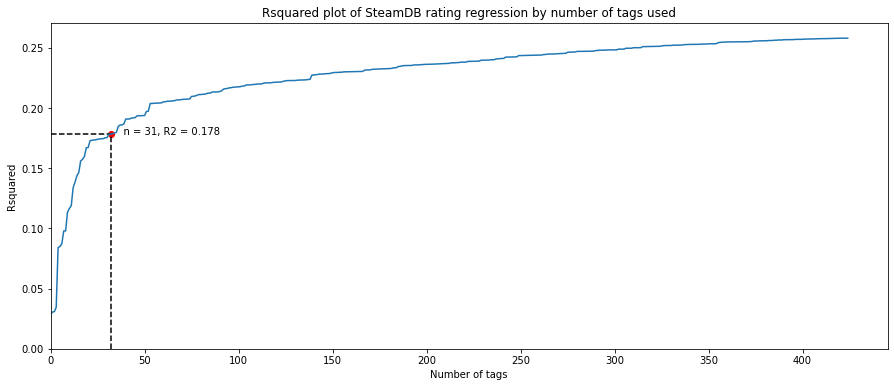

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(aux)
plt.scatter(32, 0.178, color = 'red')
plt.text(32, 0.178, "    n = 31, R2 = 0.178")
plt.hlines(0.178, 0, 32, color='black', linestyle = 'dashed')
plt.vlines(32, 0, 0.178, color= 'black', linestyle = 'dashed')
plt.xlim(0,None)
plt.ylim(0,None)
plt.title('Rsquared plot of SteamDB rating regression by number of tags used')
plt.xlabel('Number of tags')
plt.ylabel('Rsquared')
plt.show()

### Regressing the selected amount of tags

In [66]:
def removeTags(tagdict, number, tagdf):
    removed = [i[0] for i in tagdict[number:]]
    removed.append('app_id')
    removed.append('name')
    removed.append('n_pos')
    removed.append('n_neg')
    removed.append('developer')
    removed.append('publisher')
    removed.append('sdb_rating')
    removed.append('index')
    removed.append('total')
    return tagdf.drop(axis=1, labels=removed)

def highlight_pvalues(results):
    aux = []
    for i in range(32):
        if(results.pvalues[i+1]) > 0.01:
            aux.append('C3')
        else:
            aux.append('C0')
    return aux

In [67]:
y=tagdf.loc[:, 'sdb_rating']
finaldf = removeTags(tagdict, 31, tagdf)

In [95]:
size = np.shape(y)
X = np.column_stack((np.ones(size), finaldf))
model=sm.OLS(y,X)
results = model.fit() 
print(results.summary(xname= list(finaldf.columns.insert(0,'Constant'))))

                            OLS Regression Results                            
Dep. Variable:             sdb_rating   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:10   Log-Likelihood:                -93221.
No. Observations:               23487   AIC:                         1.865e+05
Df Residuals:                   23454   BIC:                         1.868e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              63.1307      0

In [96]:
regression_coef = pd.DataFrame()
regression_coef['name']= finaldf.columns
regression_coef['value']= np.array(results.params)[1:]

In [97]:
colors = highlight_pvalues(results)
for i in range(32):
    regression_coef.loc[i, 'error'] = (results.conf_int()[1][i+1]-results.conf_int()[0][i+1])/2
    regression_coef.loc[i, 'color'] = colors[i]
#regression_coef


In [98]:
regression_coef=regression_coef.sort_values(by='value', ascending=True)
#regression_coef

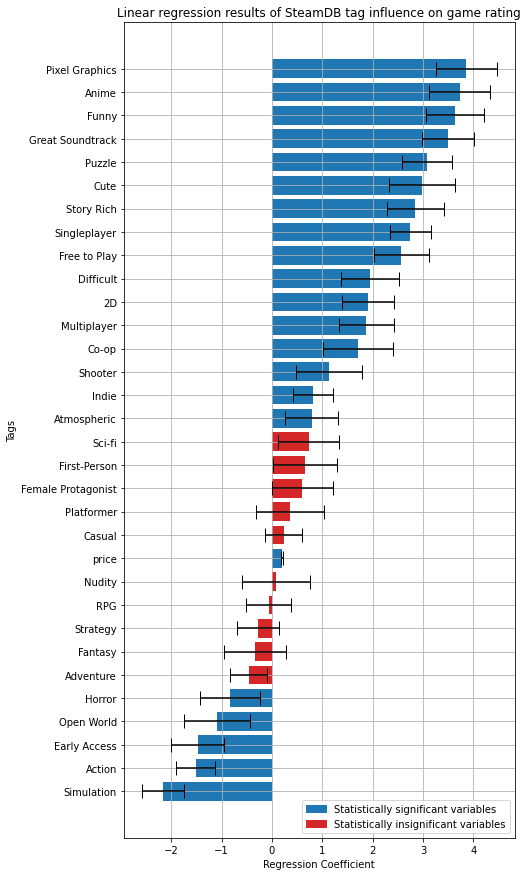

In [99]:
plt.figure(figsize=(7,15))
plt.barh(regression_coef.name,regression_coef.value, xerr = regression_coef.error, capsize = 7, color=regression_coef.color)
plt.xlabel('Regression Coefficient')
plt.grid()
plt.ylabel('Tags')
plt.title('Linear regression results of SteamDB tag influence on game rating')
colors = {'Statistically significant variables':'C0', 'Statistically insignificant variables':'C3'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()